# <center><u>Support Vector Machines (SVM)</u></center>


Support vector machine is another simple algorithm that every machine learning expert should have in his/her arsenal. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.



### PROBLEM STATEMENT- Email Spam Classifier


In this assignment, we'll build a SVM classifier to classify emails into spam and ham. The dataset, taken from the UCI ML repository, contains about 4600 emails labelled as **spam** or **ham**. 

The dataset can be downloaded from your canvas account



# **`WATCH VIDEOS IN THE PORTAL`**

## **`Watch Video 1: SVM Intuition`**

## Data Understanding

Let's first load the data and understand the attributes meanings, shape of the dataset etc.

In [ ]:
'''import numpy, pandas, train_test_split, StandardScaler,confusion_matrix, 
validation_curve, KFold, cross_val_score, GridSearchCV, matplotlib and seaborn'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# load the data, use seperation as comma(,) and header as None
email_rec = pd.read_csv('/content/Spam.csv', sep=',', header=None)


In [ ]:

#print email_rec
email_rec

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
1,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
2,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
3,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,0.31,0,0.62,0,0,0.31,0,0,0,0,...,0,0.232,0,0,0,0,1.142,3,88,0
4598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.353,0,0,1.555,4,14,0
4599,0.3,0,0.3,0,0,0,0,0,0,0,...,0.102,0.718,0,0,0,0,1.404,6,118,0
4600,0.96,0,0,0,0.32,0,0,0,0,0,...,0,0.057,0,0,0,0,1.147,5,78,0


As of now, the columns are named as integers. Let's manually name the columns appropriately (column names are available below sequencially) 

`["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]`

In [ ]:
# renaming the columns

email_rec.columns = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", 
           "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
           "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email",
           "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
           "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
           "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm",
           "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu",
           "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash",
           "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "spam"]


# print head
print(email_rec.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0  word_freq_make  word_freq_address  word_freq_all  word_freq_3d   
1               0               0.64           0.64             0   
2            0.21               0.28            0.5             0   
3            0.06                  0           0.71             0   
4               0                  0              0             0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0  word_freq_our  word_freq_over  word_freq_remove  word_freq_internet   
1           0.32               0                 0                   0   
2           0.14            0.28              0.21                0.07   
3           1.23            0.19              0.19                0.12   
4           0.63               0              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0  word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(   
1 

In [ ]:
email_rec.drop(labels=0, axis=0, inplace=True)

In [ ]:
# look at dimensions of the DataFrame
email_rec.shape



(4601, 58)

In [ ]:
# Check data type information

email_rec.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 1 to 4601
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   word_freq_make              4601 non-null   object
 1   word_freq_address           4601 non-null   object
 2   word_freq_all               4601 non-null   object
 3   word_freq_3d                4601 non-null   object
 4   word_freq_our               4601 non-null   object
 5   word_freq_over              4601 non-null   object
 6   word_freq_remove            4601 non-null   object
 7   word_freq_internet          4601 non-null   object
 8   word_freq_order             4601 non-null   object
 9   word_freq_mail              4601 non-null   object
 10  word_freq_receive           4601 non-null   object
 11  word_freq_will              4601 non-null   object
 12  word_freq_people            4601 non-null   object
 13  word_freq_report            4601 non-null   obje

In [ ]:
email_rec = email_rec.astype('float')


In [ ]:
email_rec['spam'] = email_rec['spam'].astype('int')
email_rec['capital_run_length_total'] = email_rec['capital_run_length_total'].astype('int')

In [ ]:
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 1 to 4601
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
#Check if any missing values in the dataset 

email_rec.isna().sum()


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Let's also look at the fraction of spam and ham emails in the dataset.

In [ ]:
# look at fraction of spam emails 

email_rec['spam'].value_counts() * 100/ len(email_rec)



0    60.595523
1    39.404477
Name: spam, dtype: float64

You can see that we have 40% of spam mails and 60% of ham

In [ ]:
len(email_rec.columns)

58


## Data Preparation

Let's now conduct some prelimininary data preparation steps, i.e. rescaling the variables, splitting into train and test etc. To understand why rescaling is required, let's print the summary stats of all columns - you'll notice that the columns at the end (capital_run_length_longest, capital_run_length_total etc.) have much higher values (means = 52, 283 etc.) than most other columns which represent fraction of word occurrences (no. of times word appears in email/total no. of words in email).

In [ ]:
#  print the summary stats of all columns

email_rec.describe()



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [ ]:
# splitting data into X (having all features) and y (having target i.e spam)
X = email_rec.iloc[:,:-1]

y = email_rec['spam']

In [ ]:
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (4601, 57)
Shape of y: (4601,)


#### Scaling the features

We will Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

x = x-mean(x)/std(x)

Note: Scale() is Equivalent function without the estimator API and has risk of data leak



In [ ]:
# Instantiate StandardScaler
scaler = StandardScaler()

#fit and transform X
X= scaler.fit_transform(X)


In [ ]:
# split into train and test with test_size as 30% and random_state as 4
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

In [ ]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (3680, 57)
Shape of X_test: (921, 57)
Shape of y_train: (3680,)
Shape of y_test: (921,)


## Model Building

Let's build a linear SVM model now. The ```SVC()``` class does that in sklearn. We highly recommend reading the documentation at least once.

Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

You can also refer help section for SVC given below:

In [ ]:
from sklearn.svm import SVC
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

### Model building

Firstly you are going to use the default kernal i.e RBF

In [ ]:
# Instantiate an object of class SVC(), using cost C=1
model = SVC(C=1)


# fit model on training data
model.fit(X_train, y_train)


# predict on test data
y_pred_rbf = model.predict(X_test)

##### Evaluate the model using confusion matrix 


In [ ]:
# import metrics
from sklearn.metrics import confusion_matrix, classification_report


#print confusion_matrix

matrix = confusion_matrix(y_test, y_pred_rbf)
print(matrix)

[[547  17]
 [ 45 312]]


In [ ]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       564
           1       0.95      0.87      0.91       357

    accuracy                           0.93       921
   macro avg       0.94      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



#### Print other metrics

In [ ]:
from sklearn import metrics

#accuracy = TN+TP/TN+TP+FN+FP
accuracy = (matrix[0][0]+matrix[1][1])/(matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1])
print('Accuracy', accuracy)


# precision
#precision = TP/ (TP+FP)
precision = matrix[1][1]/ (matrix[1][1]+matrix[0][1])
print('precision', precision)

# recall/sensitivity
#recall = TP/(TP+FN)

recall = matrix[1][1]/(matrix[1][1]+matrix[1][0])

print('recall', recall)

Accuracy 0.9326818675352877
precision 0.9483282674772037
recall 0.8739495798319328


In [ ]:
from sklearn import metrics
# accuracy
#accuracy = TN+TP/TN+TP+FN+FP
#accuracy = (matrix[0][0]+matrix[1][1])/(matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1])
accuracy = metrics.accuracy_score(y_test, y_pred_rbf)
print('Accuracy', accuracy)


# precision
#precision = TP/ (TP+FP)
#precision = matrix[0][0]/ (matrix[0][0]+matrix[0][1])
precision = metrics.precision_score(y_test, y_pred_rbf)
print('precision', precision)

# recall/sensitivity
#recall = TP/(TP+FN)

#recall = matrix[0][0]/(matrix[0][0]/matrix[0][1])
recall = metrics.recall_score(y_test, y_pred_rbf)
print('recall', recall)

Accuracy 0.9326818675352877
precision 0.9483282674772037
recall 0.8739495798319328


In [ ]:
# specificity (% of hams correctly classified)

#specificity = TN /(TN+FN) 
specificity = matrix[0][0]/ (matrix[0][0]+matrix[0][1])
print(specificity)

0.9698581560283688


The SVM we have built so far gives decently good results - an accuracy of 92%, sensitivity/recall (TNR) of 88%. 

### Interpretation of Results

In the confusion matrix, the elements at (0, 0) and (1,1) correspond to the more frequently occurring class, i.e. ham emails. Thus, it implies that:
- 92% of all emails are classified correctly
- 88.5% of spams are identified correctly (sensitivity/recall)
- Specificity, or % of hams classified correctly, is 95%



### K-Fold Cross Validation

Let's first run a simple k-fold cross validation to get a sense of the **average metrics** as computed over multiple *folds*. the easiest way to do cross-validation is to use the ```cross_val_score()``` function.

In [ ]:
# creating a KFold object with 5 splits , shuffle True and random_state=4
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# instantiating a SVC model with cost=1 and random_state=4
model = SVC(C=1, random_state=4)

Computing the cross-validation scores 1(note that the argument cv takes the 'folds' object, and we have specified 'accuracy' as the metric


In [ ]:
# Computing the cross-validation scores
cv_results = cross_val_score(model, X_train, y_train, cv=folds, scoring='accuracy')



In [ ]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)


#print mean accuracy of all 5 folds

print('mean accuracy is {}'.format(cv_results.mean()))


[0.91711957 0.93206522 0.94565217 0.91576087 0.92934783]
mean accuracy is 0.9279891304347826


K-fold CV helps us compute average metrics over multiple folds, and that is the best indication of the 'test accuracy/other metric scores' we can have. 

## Hyperparameter Tuning
### Grid Search to Find Optimal Hyperparameter C

Now we want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the ```GridSearchCV()``` method, which computes metrics (such as accuracy, recall etc.) 

In this case, we have only one hyperparameter, though you can have multiple, such as C and gamma in non-linear SVMs. In that case, you need to search through a *grid* of multiple values of C and gamma to find the optimal combination, and hence the name GridSearchCV.

## **`Watch Video 2 : Hyperparameter Tuning SVM using GridSearchCV`**

In [ ]:
# specify range of parameters (C) as a list ([0.1, 1, 10, 100, 1000])
params = {
    'C' : [0.1, 1, 10, 100, 1000]
}

#Intialise SVC()
model = SVC()


'''set up grid search scheme(note that we are still using the 5 fold CV scheme we set up earlier, 
scoring as accuracy, verbose as 1 and return_train_score as True)'''

model_cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=1, return_train_score=True)



In [ ]:
# fit the model on train data, it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
#convert results of grid search CV into dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

#print cv_results

cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.500943,0.342207,0.212406,0.198888,0.1,{'C': 0.1},0.910326,0.899457,0.889946,0.911685,...,0.906522,0.010781,5,0.913383,0.914742,0.919158,0.912364,0.908628,0.913655,0.003420
1,0.297768,0.064669,0.093590,0.017181,1,{'C': 1},0.932065,0.925272,0.911685,0.934783,...,0.929620,0.010849,2,0.946332,0.948370,0.949389,0.943954,0.944633,0.946535,0.002089
2,0.216606,0.019505,0.055155,0.001197,10,{'C': 10},0.940217,0.922554,0.921196,0.934783,...,0.931522,0.008089,1,0.968071,0.967391,0.969769,0.968071,0.969769,0.968614,0.000975
3,0.270719,0.009755,0.052593,0.002162,100,{'C': 100},0.936141,0.925272,0.922554,0.930707,...,0.926359,0.006567,3,0.984715,0.985734,0.986413,0.986073,0.988791,0.986345,0.001348
4,0.361998,0.010902,0.045250,0.001058,1000,{'C': 1000},0.919837,0.914402,0.907609,0.913043,...,0.913587,0.003900,4,0.992188,0.992527,0.993886,0.993886,0.994905,0.993478,0.000994


You can expect a different result in the dataframe at your end as grid search will shuffle the data during cross validation and computes the result.

To get a better sense of how training and test accuracy varies with C, let's plot the tranining and test accuracies against C.

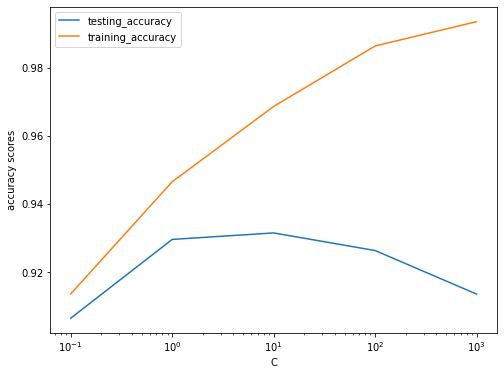

In [ ]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], label='testing_accuracy')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], label='training_accuracy')
plt.xlabel('C')
plt.ylabel('accuracy scores')
plt.legend()
plt.xscale('log')



Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to **overfit** the model. This is because a high C value aims to classify all training examples correctly (since C is the *cost of misclassification* - if you impose a high cost on the model, it will avoid misclassifying any points by overfitting the data). 



Let's finally look at the optimal C values found by GridSearchCV.

In [ ]:
#get best score for above gridearch
best_score = model_cv.best_score_


#get best c value as well
best_C = model_cv.best_params_['C']


print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9315217391304348 at C = 10


Let's now look at the metrics corresponding to C=10.

In [ ]:
# model with the best value of C
model = SVC(C=10)

# fit model on training data
model.fit(X_train, y_train)

# predict on test data
y_pred_rbf1 =model.predict(X_test)

In [ ]:
#print confusion_matrix

cm = confusion_matrix(y_test, y_pred_rbf1)
print(cm)

[[547  17]
 [ 41 316]]


You can see type 2 error is reduced after hyperparameter tuning
![image.png](attachment:image.png)

Print other metrics


In [ ]:
# accuracy
print('Accuracy', metrics.accuracy_score(y_test, y_pred_rbf1))


# precision

print('precision', metrics.precision_score(y_test, y_pred_rbf1))


# recall/sensitivity

print('recall', metrics.recall_score(y_test, y_pred_rbf1))


Accuracy 0.9370249728555917
precision 0.948948948948949
recall 0.8851540616246498


## Optimising for Other Evaluation Metrics

In this case, we had optimised (tuned) the model based on overall accuracy, though that may not always be the best metric to optimise. For example, if you are concerned more about catching all spams (positives), you may want to maximise TPR or sensitivity/recall. If, on the other hand, you want to avoid classifying hams as spams (so that any important mails don't get into the spam box), you would maximise the TNR or specificity.





In [ ]:
# specify params with C as list [0.1, 1, 10, 100, 1000]
params = {
    'C' : [0.1, 1, 10, 100, 1000]
}

# specify scores/metrics in an iterable i.e.['accuracy', 'precision', 'recall']
scores = ['accuracy', 'precision', 'recall']

# iterate through scores
for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric with estimator, params, cv, scoring as scores and return_train_score=True
    clf = GridSearchCV(model, param_grid=params, cv=4, scoring=score, return_train_score=True)
    
    
    # fit model on training data
    clf.fit(X_train, y_train)
    
    
    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.9320652173913043 at C = {'C': 10}


# Tuning hyper-parameters for precision
 The highest precision score is 0.9369899181239908 at C = {'C': 0.1}


# Tuning hyper-parameters for recall
 The highest recall score is 0.9004120879120878 at C = {'C': 10}




Thus, you can see that the optimal value of the hyperparameter varies significantly with the choice of evaluation metric.


We have 3 most important hyperparameters to optimise in SVM - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

To know what these parameters mean check out below reference

Reference doc: https://towardsdatascience.com/svm-hyperparameters-explained-with-visualizations-143e48cb701b

Lets do optimize these parameter values and check our model

In [ ]:
# Get list of all available kernels in SVM in a list i.e. ['Polynomial', 'RBF', 'Sigmoid','Linear']
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']



#A function which returns the corresponding SVC model for different kernals
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [ ]:
# import classification_report
from sklearn.metrics import classification_report


# Iterate in the range of 4
for i in range(4):
    
    # Use getClassifier() function for different ith value to get SVC model using different kernal
    svclassifier = getClassifier(i)
    
    # fit above model
    svclassifier.fit(X_train, y_train)

    # Make prediction on test data
   
    y_predc = svclassifier.predict(X_test)
    
    # Check which kernal is used as per kernels list

    print('Evaluation', kernels[i], 'kernal')
    # Evaluate our model using classification_report

    print(classification_report(y_test, y_predc))




Evaluation Polynomial kernal
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       564
           1       0.93      0.20      0.32       357

    accuracy                           0.68       921
   macro avg       0.80      0.59      0.56       921
weighted avg       0.77      0.68      0.61       921

Evaluation RBF kernal
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       564
           1       0.95      0.87      0.91       357

    accuracy                           0.93       921
   macro avg       0.94      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921

Evaluation Sigmoid kernal
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       564
           1       0.89      0.80      0.84       357

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.87       9

From above you can see thta rbf krnals gives better prediction result

lets do gridsearch and confirm value of C, gamma and kernel.

`
C= [0.1,1, 10, 100]
gamma= [1,0.1,0.01,0.001]
kernel= ['rbf', 'poly', 'sigmoid']`

In [ ]:
# Create a dictionary param_grid for C, gamma and kernel values given below
param_grid = {
    'C' : [0.1,1, 10, 100],
    'gamma' : [1,0.1,0.01,0.001],
    'kernel' : ['rbf', 'poly', 'sigmoid']
    
}

#Initialise GridSearchCV with SVC(), param_grid, refit=True and verbose=2 and  return_train_score=True
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=2, return_train_score=True)


#fit Gridsearch on X_train and y_train

grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             return_train_score=True, verbose=2)

In [ ]:
# cv results into a dataframe
cv_results = pd.DataFrame(grid.cv_results_)

# print cv_result

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.951754,0.367510,0.273823,0.070009,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.608696,0.610054,...,0.608696,0.002717,45,0.612092,0.615489,0.611753,0.607677,0.609035,0.611209,0.002705
1,0.482801,0.167671,0.028432,0.010055,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.921196,0.911685,...,0.912772,0.004579,10,0.994905,0.995245,0.994565,0.994905,0.995245,0.994973,0.000254
2,0.444608,0.080465,0.071079,0.014161,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.794837,0.762228,...,0.777989,0.014292,37,0.761209,0.774117,0.768682,0.766984,0.763247,0.766848,0.004494
3,0.536285,0.057122,0.146985,0.001869,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.804348,0.808424,...,0.809511,0.011795,30,0.834918,0.832201,0.827785,0.823030,0.830163,0.829620,0.004045
4,0.330706,0.012276,0.044866,0.001876,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.883152,0.869565,...,0.876630,0.005916,23,0.918139,0.918818,0.918139,0.923913,0.915761,0.918954,0.002688
5,0.414080,0.070663,0.075075,0.012839,0.1,0.1,sigmoid,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.853261,0.841033,...,0.837500,0.014240,27,0.823030,0.840353,0.848166,0.830163,0.830163,0.834375,0.008833
6,0.341846,0.034422,0.099579,0.001291,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.911685,0.903533,...,0.908424,0.008872,13,0.910326,0.912704,0.914742,0.911685,0.904212,0.910734,0.003565
7,0.501900,0.005794,0.086948,0.001498,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.633152,0.635870,...,0.635326,0.003283,43,0.643003,0.640625,0.643003,0.637908,0.646399,0.642188,0.002822
8,0.493228,0.115080,0.101253,0.021626,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.884511,0.870924,...,0.877446,0.010433,22,0.875000,0.882812,0.883152,0.885190,0.872283,0.879687,0.005077
9,0.510873,0.011193,0.149755,0.003866,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.801630,0.797554,...,0.797826,0.003975,32,0.792459,0.806046,0.802649,0.805707,0.802310,0.801834,0.004930


- **High values of gamma** lead to **overfitting** (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99% 
- The **training score increases with higher gamma**, though the **test scores are comparable** (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite *simple non-linear model*


In [ ]:
# get the optimal accuracy score and hyperparameters
best_score = grid.best_score_
# get the optimal hyperparameters
best_hyperparams = grid.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9353260869565219 corresponding to hyperparameters {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100, kernel=rbf), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~92.5%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [ ]:
# model with optimal hyperparameters as obtained above
model = SVC(C=100, gamma=0.001, kernel='rbf')

#fit model on training data
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# print confusion metrics

print(confusion_matrix(y_test, y_pred))

# print accuracy
print('accuracy:',metrics.accuracy_score(y_test, y_pred))


#print precision

print('precision:',metrics.precision_score(y_test, y_pred))


#print sensitivity
print('Sensitivity:', metrics.recall_score(y_test, y_pred))



[[545  19]
 [ 38 319]]
accuracy: 0.9381107491856677
precision: 0.9437869822485208
Sensitivity: 0.8935574229691877


Hurray! we improved our model by reduced type1 and type 2 errors after hyperparameter tuning.

Note: Don't worry if your result varies plus minus 1-2%. 

---------------------
# Party time ! Congrats..you have completed your SVM milestone challenge

----------------

# FeedBack Time

We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

Please fill this feedback form https://docs.google.com/forms/d/e/1FAIpQLSfjBmH0yJSSA34IhSVx4h2eDMgOAeG4Dk-yHid__NMTk3Hq5g/viewform